In [1]:
from GQA.functions.function import Function

In [2]:
#-----------------------Tutorial 1-----------------------#
#--------------------------------------------------------#
#-----------Define a function and optimize it------------#
#--------------------------------------------------------#

In [3]:
# To define the function to optimize a .txt file is needed inside GQA.functions.input_functions
# The first line is used to define the function and it has the limit (up to now) to be two variables
# the line will be read as python code with these functions and constant: pi,e,sin,cos,sqrt,absolute.
#
# Format of .txt:
#
# <function(x,y)>
# <lower bound for x>
# <higher bound for x>
# <lower bound for y>
# <higher bound for y>
#
# For example we optimize this function defined in file "func1.txt"
#
# sin(x)*exp((1-cos(y))**2)+cos(y)*exp((1-sin(x))**2)+(x-y)**2
# -10
# 10
# -10
# 10

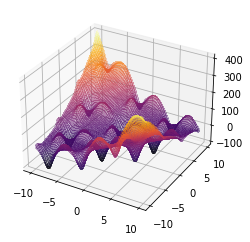

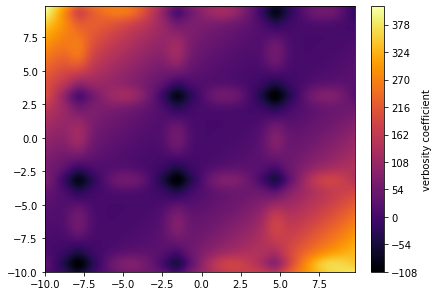

In [4]:
# Let's see if the function is read correctly 

fun1 = Function("func1.txt")
fun1.plot_()
fun1.plot_contour()



In [5]:
from GQA.quantum.gqa_function import GQA_function

# parameters for the algorithm

crossover_probability = 0.75        # rate of crossver
generations = 100                   # number of generations for the algorithm 
m = 64                              # number of genes for each chromosome, that means that each variable will use 32 bit of precision, the higher and the more values in the solution
                                    # space we can visit 
n = 40                              # number of chromosomes 
mutation_rate = 0.025               # each gene mutates with a chance of 2.5% for each generation (avoid to get stuck in local optimals)
delta_theta = 0.05                  # delta_theta parameter for the quantum rotation gates (the increment) -> 0.05pi
s = 0                               # seed: used for random functions
verbose = 0                         # 0: don't print anything, 1: print results for each generation
function = "func1"                  # file name (without extension)
decay = False                       # if true delta_theta decrease over time 


gqa = GQA_function(crossover_probability = crossover_probability,generations=generations, num=m, num_pop=n, mutation_rate=mutation_rate,delta=delta_theta, seed=s, verbose=verbose, function=function, decay=True)
gqa.run()

In [6]:
# retrieve results 

best_chromosome = gqa.best_chromosome
best_eval = gqa.best_fitness
best_x = fun1.bin_to_real_x(best_chromosome[:int(m/2)])
best_y = fun1.bin_to_real_y(best_chromosome[int(m/2):])

print(f"best chromosome: {best_chromosome}")
print(f"best evaluation: {best_eval}")
print(f"x: {best_x} y: {best_y}")


best chromosome: [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0]
best evaluation: 375.8503698213386
x: 9.750622785650194 y: -9.999658837914467


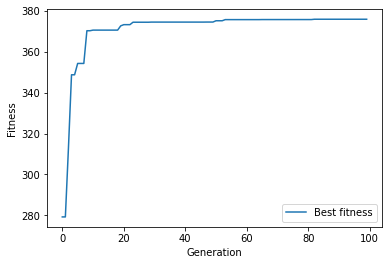

In [7]:
from matplotlib import pyplot as plt

fig = plt.figure()

x = range(generations)
y = gqa.best_evaluations

ax = fig.add_subplot(1,1,1)
ax.plot(x,y,label=f"Best fitness")

ax.set_xlabel('Generation')
ax.set_ylabel('Fitness')
ax.legend()

plt.show()

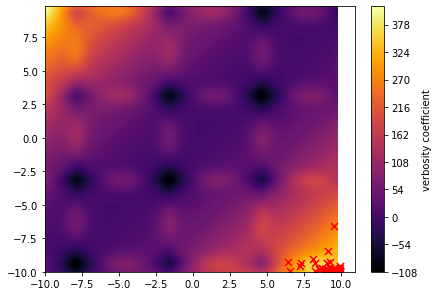

In [8]:
# plot best chromosomes for each generation
gqa.plot_history()